# Importing standard libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Seeding values
### This is done so that code values stay uniform

In [2]:
from numpy.random import seed
seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# Reading the data into a dataframe

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
5,8;21914;1;151;67.0;120;80;2;2;0;0;0;0
6,9;22113;1;157;93.0;130;80;3;1;0;0;1;0
7,12;22584;2;178;95.0;130;90;3;3;0;0;1;1
8,13;17668;1;158;71.0;110;70;1;1;0;0;1;0
9,14;19834;1;164;68.0;110;60;1;1;0;0;0;0


In [5]:
file_path = '/content/drive/My Drive/DS340/cardio_train.csv'
df = pd.read_csv(file_path, sep=";")

#url = 'https://raw.githubusercontent.com/YoofKhaneja/Analyzing-Risk-of-CHD-with-Discriminative-NN/master/framingham.csv'
#hd = pd.read_csv(url)

df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [16]:
# renaming some columns
df = df.rename(columns={'ap_hi': 'sys_bp', 'ap_lo': 'dys_bp'})


# making age variable from days to years
df['age'] = df['age'].apply(lambda x: round(x/365, 3))

In [17]:
df.head(10)

,id,age,gender,height,weight,sys_bp,dys_bp,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.392,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.874,1,156,56.0,100,60,1,1,0,0,0,0
5,8,60.038,1,151,67.0,120,80,2,2,0,0,0,0
6,9,60.584,1,157,93.0,130,80,3,1,0,0,1,0
7,12,61.874,2,178,95.0,130,90,3,3,0,0,1,1
8,13,48.405,1,158,71.0,110,70,1,1,0,0,1,0
9,14,54.340,1,164,68.0,110,60,1,1,0,0,0,0


# **Exploratory Data Analysis**

**Gender split analysis**

gender
1    45530
2    24470
Name: count, dtype: int64


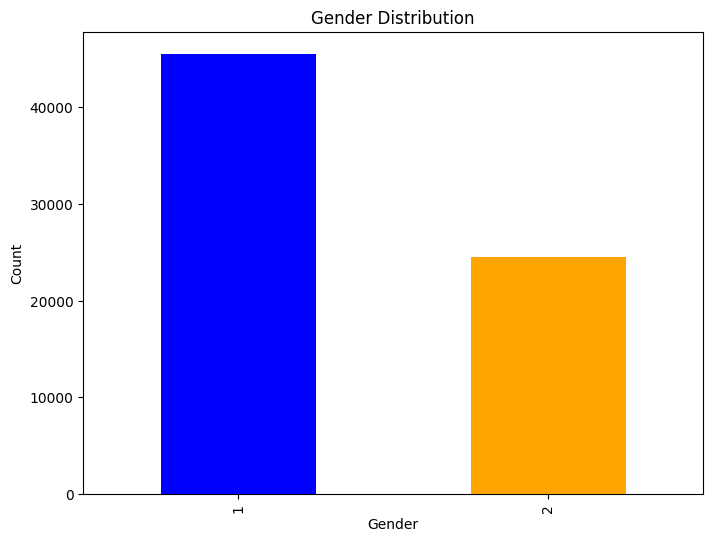

In [18]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

# Plotting
plt.figure(figsize=(8,6))
gender_counts.plot(kind='bar', color=['blue', 'orange'])


plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

*From this we can see that the gender split is pretty imbalanced. The difference in heart disease prediction by gender is something we want to investigate, specifically with which features impact a certain gender more than a the other.*

**Target variable analysis**

Total patients at risk of CHD:  34979
Total patients not at risk of CHD:  35021


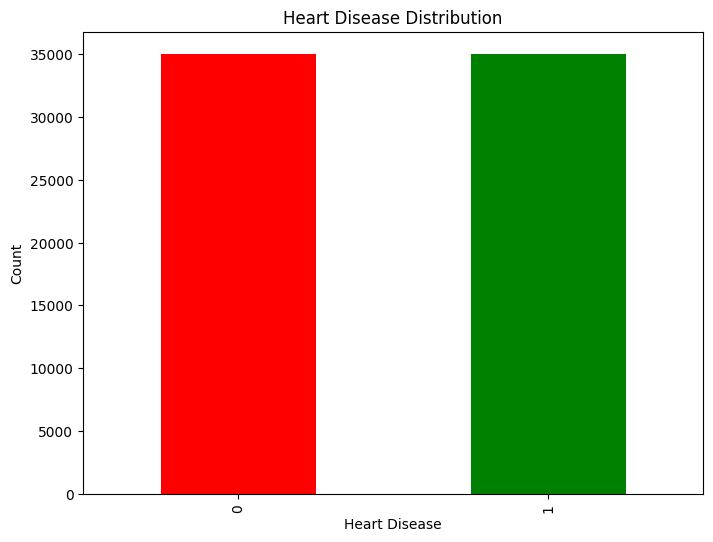

In [22]:
hd_counts = df['cardio'].value_counts()

from collections import Counter
tv_count = Counter(df['cardio'])
print('Total patients at risk of CHD: ', tv_count[1])
print('Total patients not at risk of CHD: ', tv_count[0])

# Plotting
plt.figure(figsize=(8,6))
hd_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Display the plot
plt.show()

*The heart disease target variable in this data set is much more balanced than the data set the authors used previously. This is good as it will prevent any bias in the model where it could just predict one of the variables for all predictions and still return a high accuracy.*

**Distribution of all features**

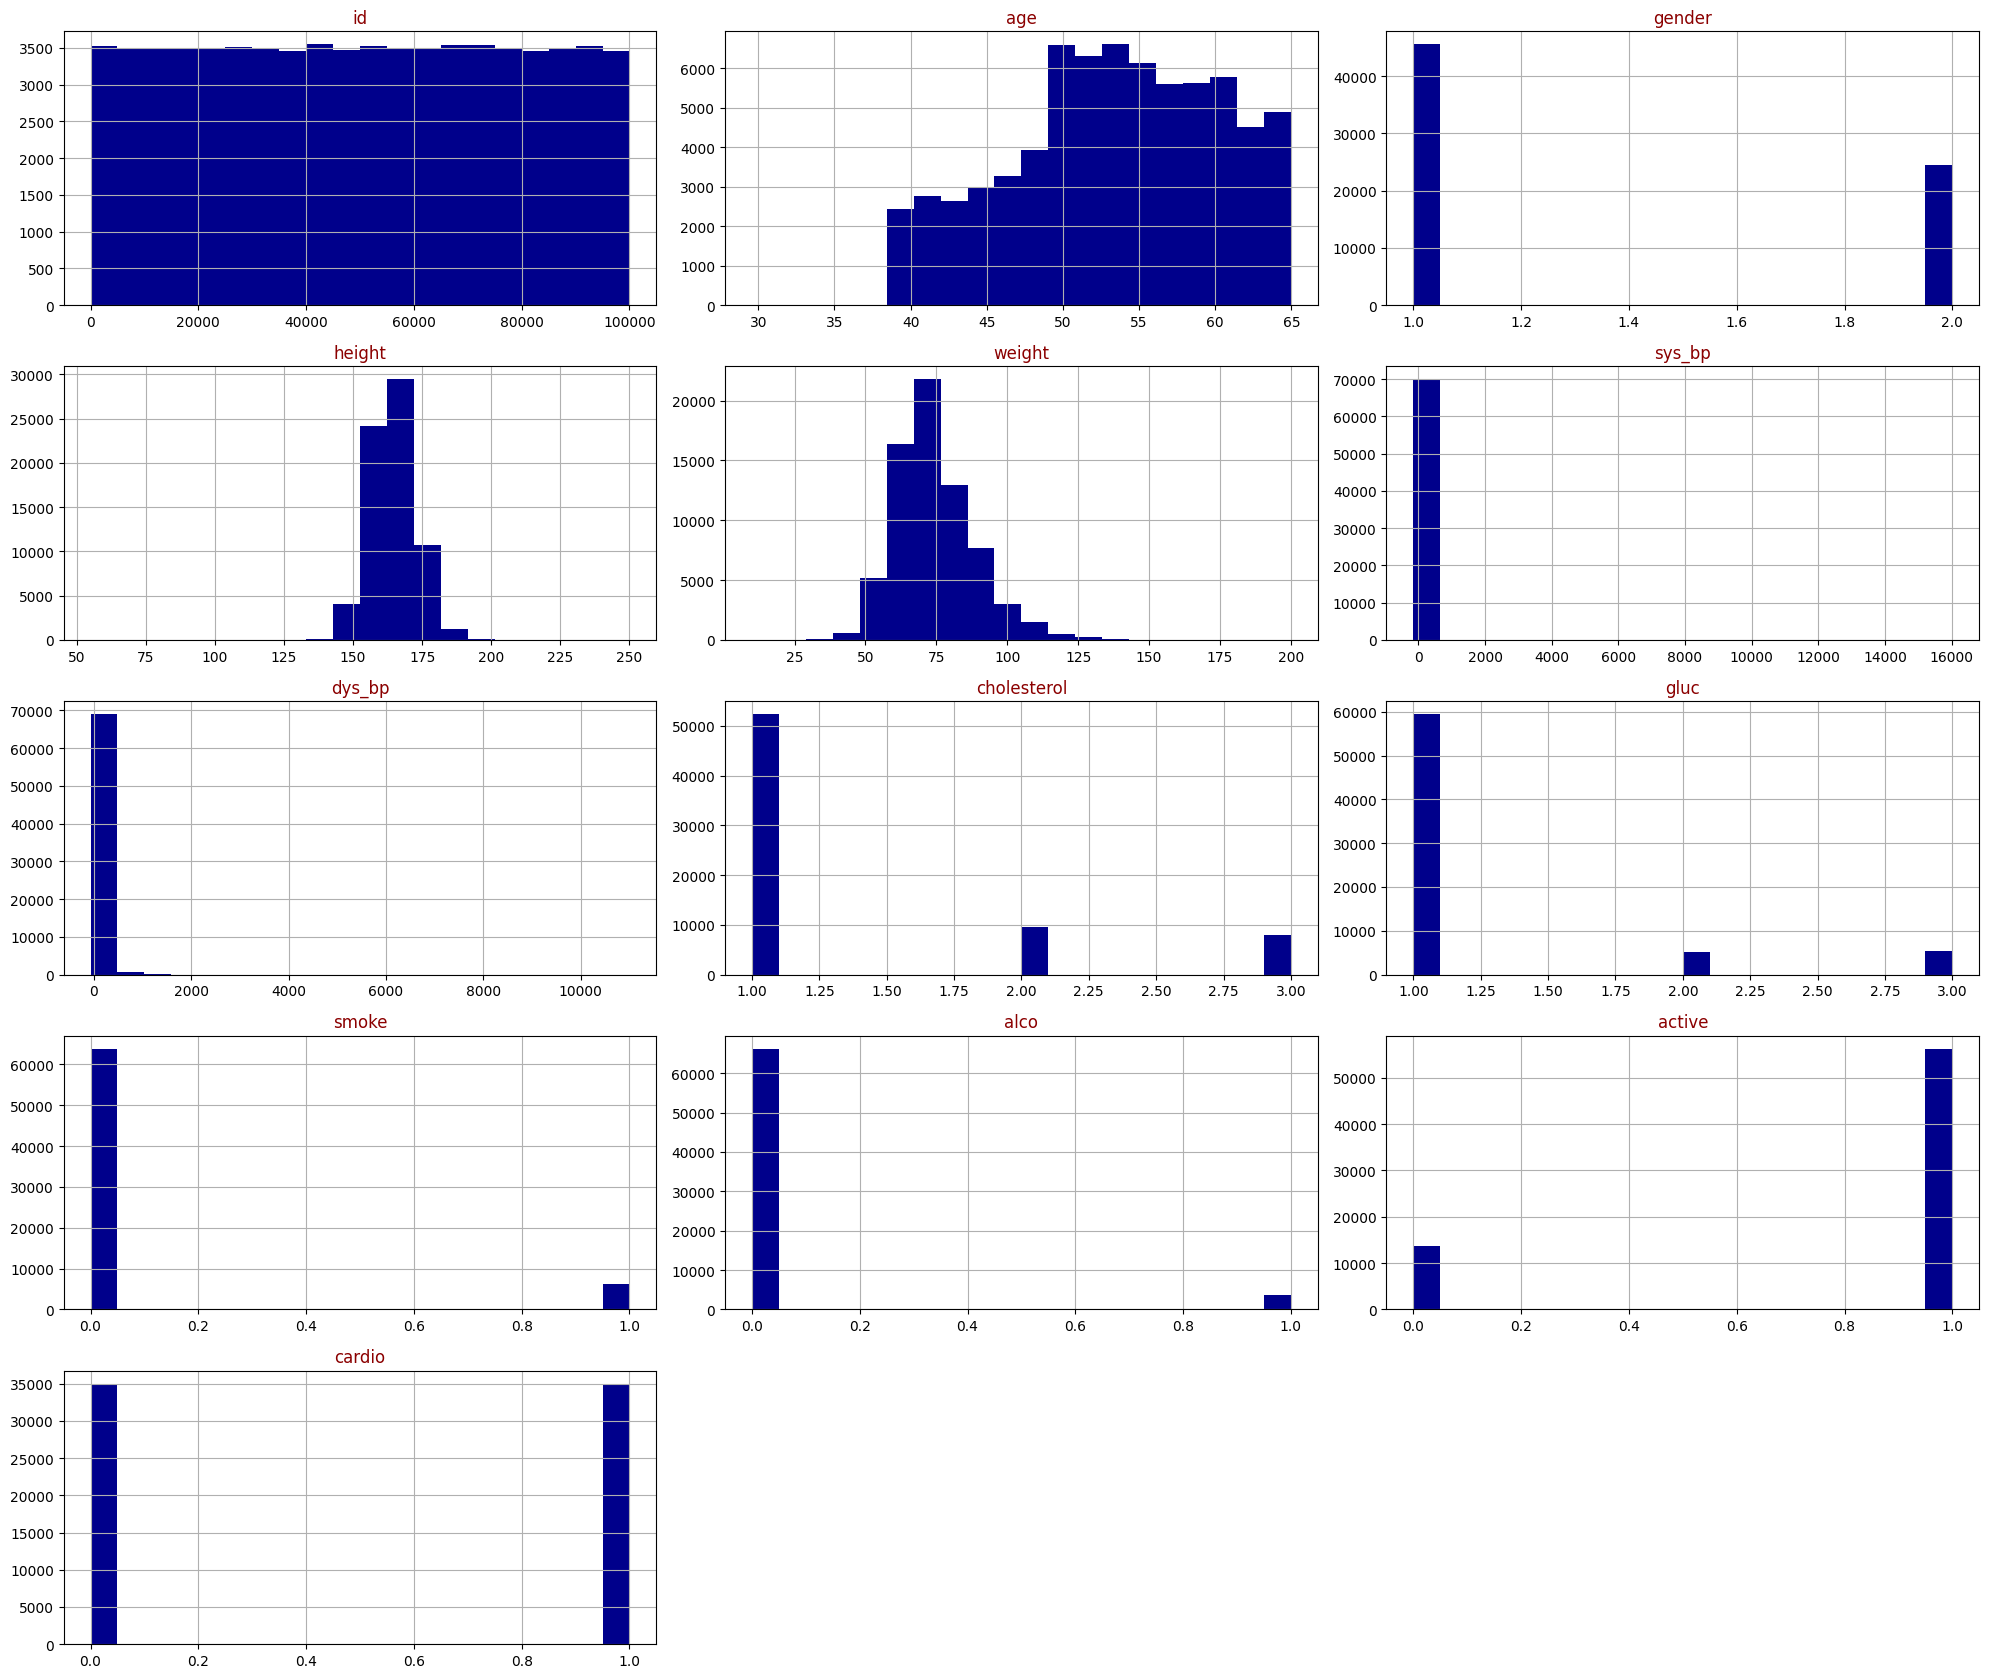

In [20]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'DarkBlue')
        ax.set_title(feature, color = 'DarkRed')
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 6, 3)

*There seems to be some clear outliers, specifically in the sys_bp and dys_bp variables, as you can't have a systolic or dystolic blood pressure over like 400 (highest recorded blood pressure was 370/360). Based on this, we will have to remove some outliers*

**Correlation plot**

<Axes: >

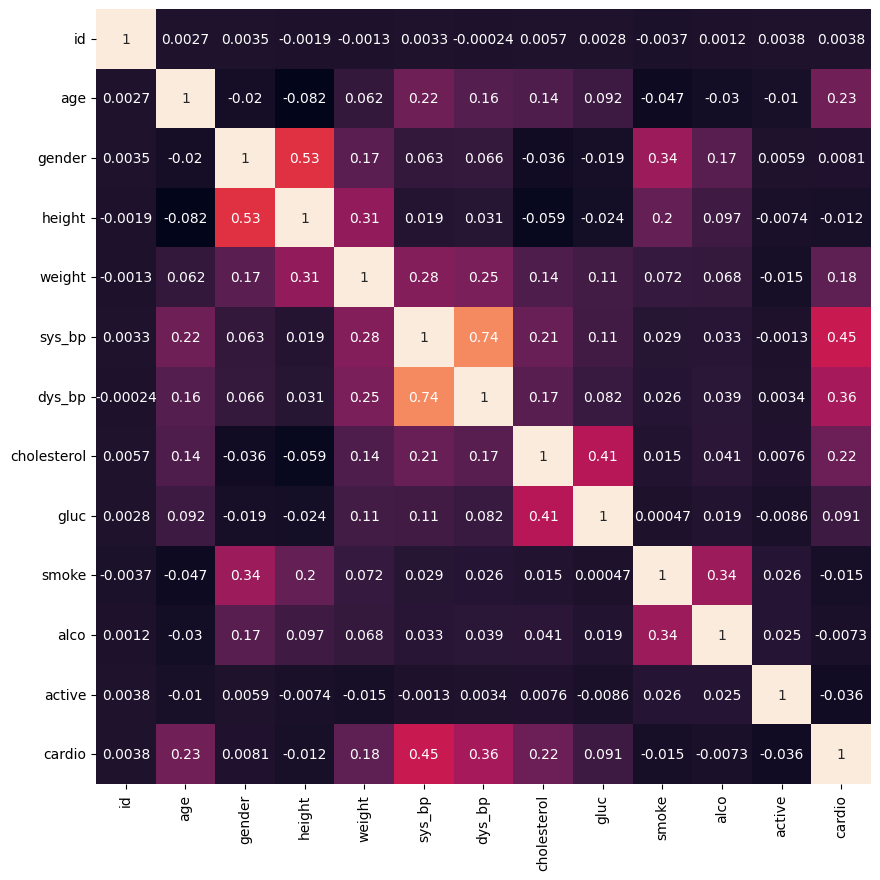

In [23]:
corr = df.corr(method = 'spearman')

plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

*There is some significant correlation between systolic and dystolic blood pressure with having cardiovascular disease. This makes sense as blood pressure can be a easy indicator of heart diseases. Gender has very little correlation, which may point to the fact that a certain gender is not more susceptible to having a cardiovascular disease. Through our research we plan to see if this is true and how features impact gender differently.*

**Missing values**

In [25]:
print('Missing values: ')
print(df.isnull().sum())

mv = np.array(df.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)

tr = 0
for i in df.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
id             0
age            0
gender         0
height         0
weight         0
sys_bp         0
dys_bp         0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Total missing attributes:  0

Total rows with missing data:  0


*No missing values in the dataset, so no imputation methods will be necessary*

***--EVERYTHING BELOW HERE IS FROM THE ORIGINAL - COPIED & PASTED THINGS TO ABOVE SO WE CAN KEEP THEIR WORK FOR KNOW--***

# Data exploration

In [ ]:
print('Total patients: ', hd.shape[0])
print('Total attributes: ', hd.shape[1] - 1)
print('Number of labels: ', 1, '(', hd.columns[15], ')')

Total patients:  4240
Total attributes:  15
Number of labels:  1 ( TenYearCHD )


In [ ]:
hd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


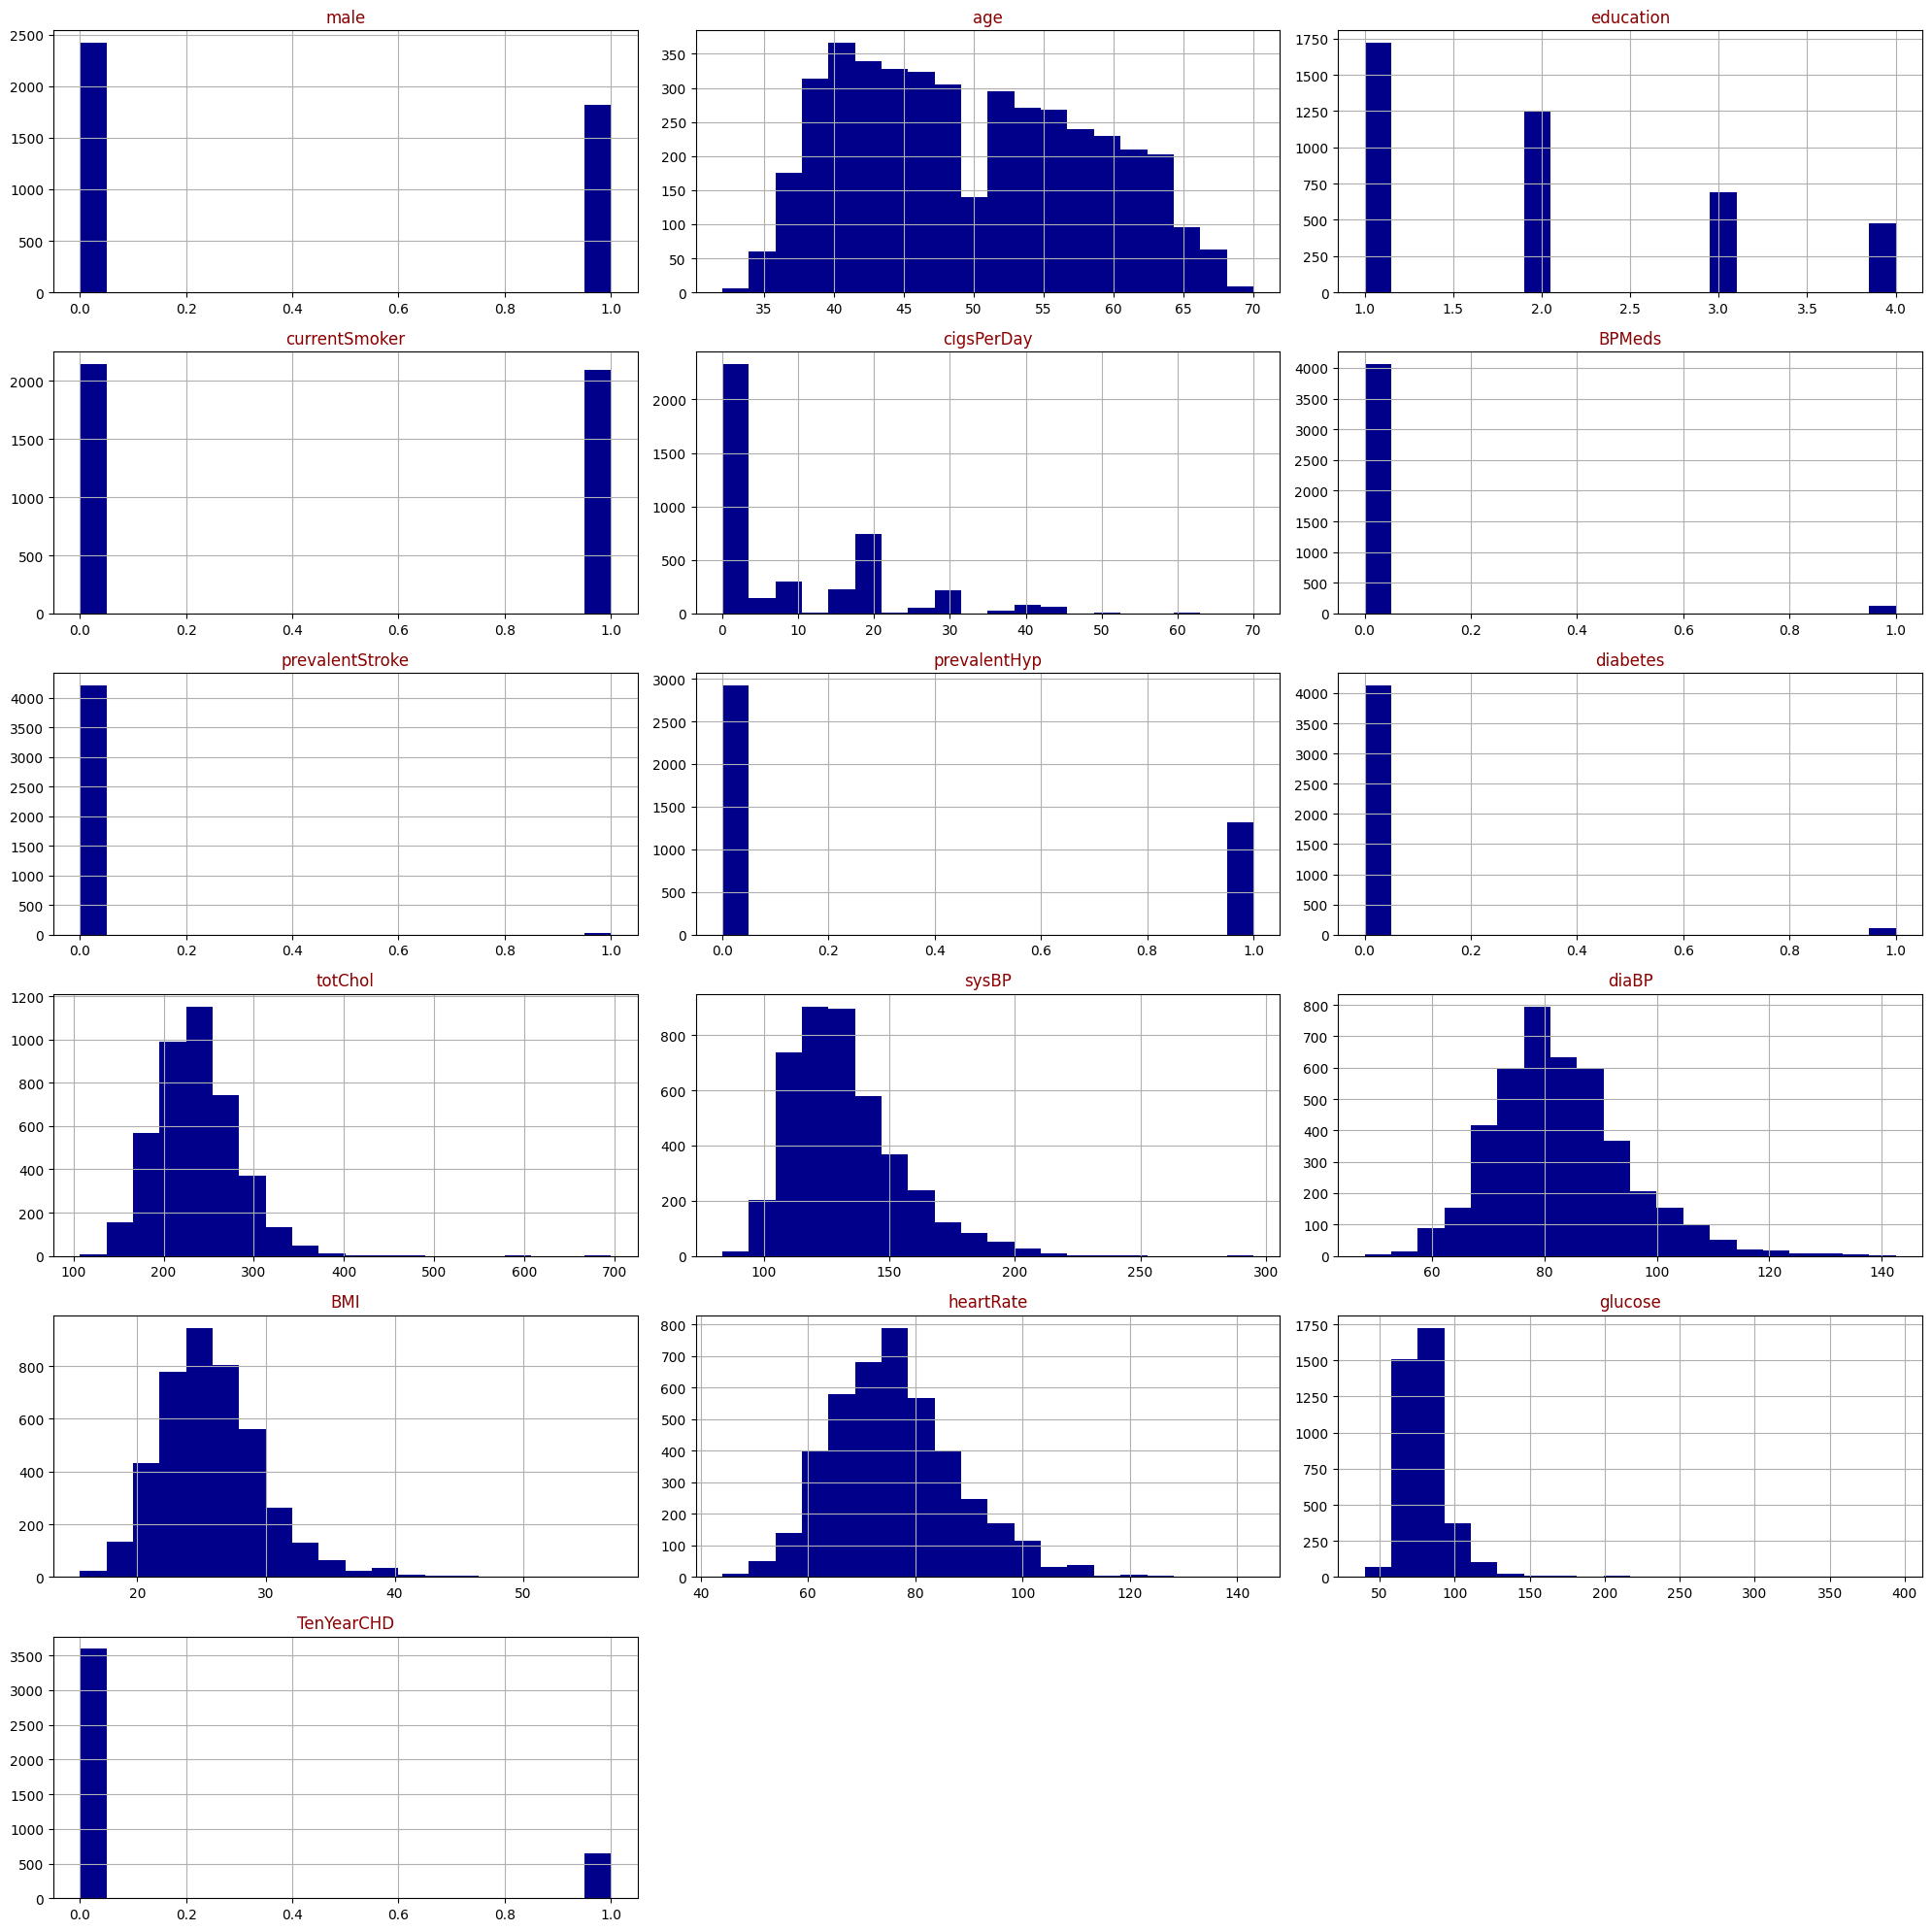

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'DarkBlue')
        ax.set_title(feature, color = 'DarkRed')
    fig.tight_layout()
    plt.show()
draw_histograms(hd, hd.columns, 6, 3)

<Axes: >

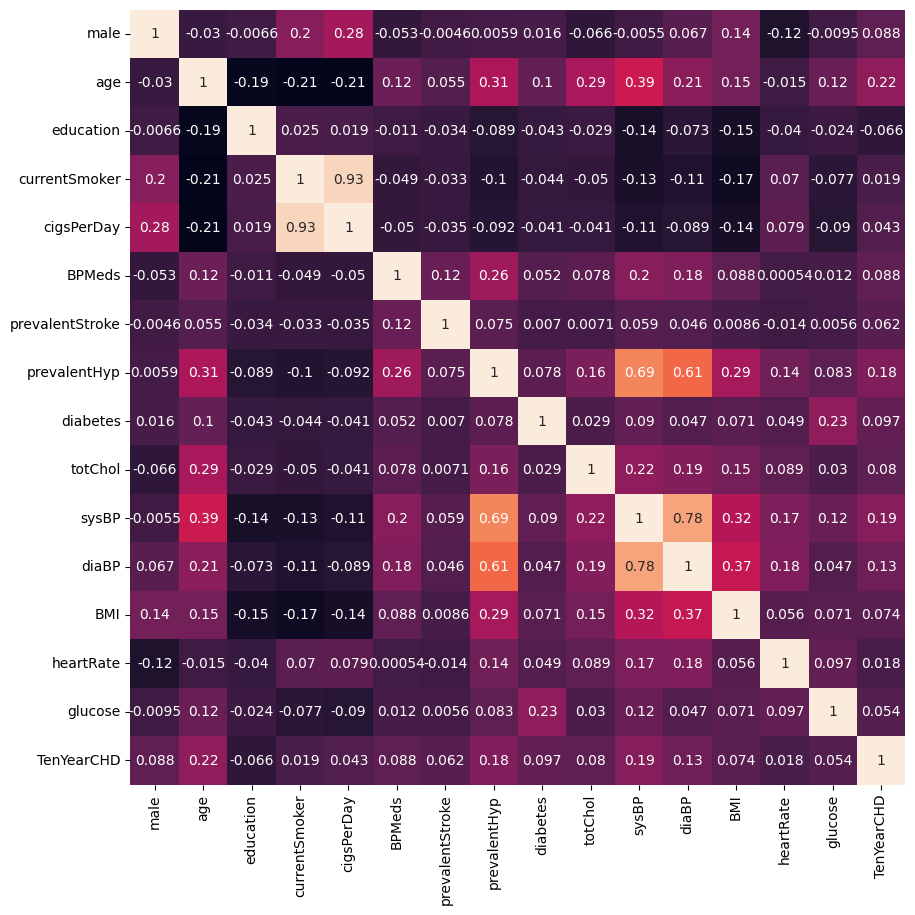

In [ ]:
corr = hd.corr(method = 'spearman')

plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3596


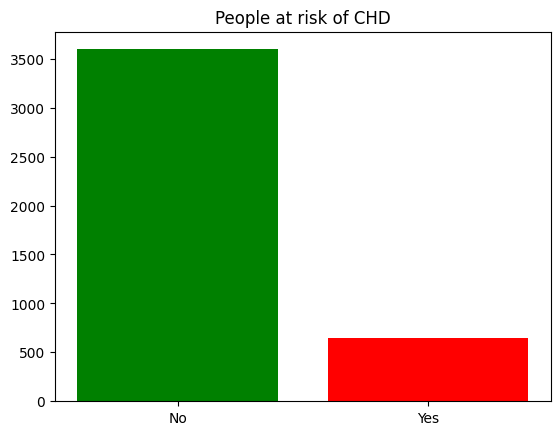

In [ ]:
from collections import Counter
chdc = Counter(hd['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

In [ ]:
print('Missing values: ')
print(hd.isnull().sum())

mv = np.array(hd.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)

tr = 0
for i in hd.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total missing attributes:  645

Total rows with missing data:  582


# Imputing missing values using different techniques

In [ ]:
import random
hd.BPMeds = hd.BPMeds.fillna(0)
edu = [1, 2, 3, 4]
c = 0
for i in range(len(hd.education)):
    if hd.education[i] not in edu:
        t = random.randint(1, 4)
        hd.education[i] = t
print(hd.isnull().sum())

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
# Had to add this line since the fancyimpute library wasn't installed
!pip install fancyimpute
from fancyimpute import IterativeImputer

hdi = pd.DataFrame(IterativeImputer().fit_transform(hd))

hdi.columns = hd.columns

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.1 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=15f4cd11094d832941451f20b638e1c1a98c6c819762f34d338b3f789983ec27
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=824656a8fdfcbf6ca87fa0e94a3d88efa219c84ca3669b4e175fa8f17225d641
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
hdi.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
hdi.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.00000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.00000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.00000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.00000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.00000,0.0
5,0.0,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.00000,0.0
6,0.0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.00000,1.0
7,0.0,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.00000,0.0
8,1.0,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.00000,0.0
9,1.0,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.00000,0.0


In [ ]:
hdi.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.993632,0.494104,9.067514,0.029245,0.005896,0.310613,0.025708,236.750552,132.354599,82.897759,25.800073,75.878893,81.816200,0.151887
std,0.495027,8.572942,1.027440,0.500024,11.906105,0.168513,0.076569,0.462799,0.158280,44.355011,22.033300,11.910394,4.073153,12.023931,23.013726,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.385000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,85.605278,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Formatting the data

In [ ]:
hd_ = hdi.copy(deep = True)
hd_['age'] = pd.cut(hd_['age'],

                    5,
                    labels = [1, 2, 3, 4, 5])
hd_['cigsPerDay'] = pd.cut(hd_['cigsPerDay'],
                           6,
                           labels = [1, 2, 3, 4, 5, 6])
hd_['totChol'] = pd.cut(hd_['totChol'],
                        13,
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
hd_['sysBP'] = pd.cut(hd_['sysBP'],
                      10,
                      labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['diaBP'] = pd.cut(hd_['diaBP'],
                      8,
                      labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['BMI'] = pd.cut(hd_['BMI'],
                    10,
                    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['heartRate'] = pd.cut(hd_['heartRate'],
                          8,
                          labels = [1, 2, 3, 4, 5, 6, 7, 8])

hd_['age'] = hd_['age'].apply(lambda x: round(x*0.2, 2))
hd_['education'] = hd_['education'].apply(lambda x: round(x*0.25, 2))
hd_['cigsPerDay'] = hd_['cigsPerDay'].apply(lambda x: round(x*0.16, 2))
hd_['totChol'] = hd_['totChol'].apply(lambda x: round(x*0.077, 2))
hd_['sysBP'] = hd_['sysBP'].apply(lambda x: round(x*0.1, 2))
hd_['diaBP'] = hd_['diaBP'].apply(lambda x: round(x*0.125, 2))
hd_['BMI'] = hd_['BMI'].apply(lambda x: round(x*0.1, 2))
hd_['heartRate'] = hd_['heartRate'].apply(lambda x: round(x*0.125, 2))
hd_['glucose'] = hd_['glucose'].apply(lambda x: round(x*0.067, 2))

hd_.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.2,1.00,0.0,0.16,0.0,0.0,0.0,0.0,0.15,0.2,0.25,0.3,0.38,0.13,0.0
1,0.0,0.4,0.50,0.0,0.16,0.0,0.0,0.0,0.0,0.31,0.2,0.38,0.4,0.62,0.13,0.0
2,1.0,0.6,0.25,1.0,0.32,0.0,0.0,0.0,0.0,0.31,0.3,0.38,0.3,0.38,0.13,0.0
3,0.0,0.8,0.75,1.0,0.48,0.0,0.0,1.0,0.0,0.23,0.4,0.50,0.4,0.25,0.20,1.0
4,0.0,0.4,0.75,1.0,0.32,0.0,0.0,0.0,0.0,0.31,0.3,0.50,0.2,0.50,0.13,0.0
5,0.0,0.4,0.50,0.0,0.16,0.0,0.0,1.0,0.0,0.23,0.5,0.75,0.4,0.38,0.20,0.0
6,0.0,1.0,0.25,0.0,0.16,0.0,0.0,0.0,0.0,0.23,0.3,0.25,0.5,0.25,0.13,1.0
7,0.0,0.4,0.50,1.0,0.32,0.0,0.0,0.0,0.0,0.39,0.1,0.25,0.2,0.38,0.13,0.0
8,1.0,0.6,0.25,0.0,0.16,0.0,0.0,1.0,0.0,0.31,0.3,0.50,0.3,0.38,0.13,0.0
9,1.0,0.4,0.25,1.0,0.48,0.0,0.0,1.0,0.0,0.23,0.4,0.62,0.2,0.50,0.20,0.0


# Generating pairs for the Siamese network

In [ ]:
import random

hd1 = hd_[hd_['TenYearCHD'] == 1.0].astype('float32')
hd0 = hd_[hd_['TenYearCHD'] == 0.0].astype('float32')

hd1x = hd1.iloc[:, :-1]
hd1y = hd1.iloc[:, -1]
hd0x = hd0.iloc[:, :-1]
hd0y = hd0.iloc[:, -1]

hd1x = hd1x.to_numpy()
hd1y = hd1y.to_numpy()
hd0x = hd0x.to_numpy()
hd0y = hd0y.to_numpy()

p01 = []
p11 = []
p00 = []


for i in range(len(hd1x)):
    for j in range(len(hd0x)):
        p01 += [[hd0x[j], hd1x[i]]]
for i in range(len(hd1x)):
    for j in range(len(hd1x)):
        p11 += [[hd1x[j], hd1x[i]]]
for i in range(len(hd0x)):
    for j in range(len(hd0x)):
        p00 += [[hd0x[j], hd0x[i]]]

print([len(p01), len(p00), len(p11)])

[2315824, 12931216, 414736]


In [ ]:
p = []
label = []
for i in range(414736):
    t1 = random.randint(0, 2315823)
    t2 = random.randint(0, 12931215)
    p.append(p01[t1])
    label.append(0)
    if i%2 == 0:
        p.append(p00[t2])
        label.append(1)
    else:
        p.append(p11[i])
        label.append(1)

X = np.array(p)
Y = np.array(label)

print([len(X), len(Y)])

[829472, 829472]


In [ ]:
for _ in range(100):
    p = np.random.permutation(829472)
    X = X[p]
    Y = Y[p]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train[10:20])

(663577, 2, 15)
(165895, 2, 15)
(663577,)
(165895,)
[0 0 1 1 1 0 1 0 0 1]


In [ ]:
cc = Counter(y_test)
print(cc[1])
print(cc[0])

83004
82891


# Creating and compiling the neural network model

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Lambda
from keras.optimizers import RMSprop
from keras import regularizers
# had to change this line slightly because of errors that arised because of outdated syntax
from tensorflow.keras import backend as K
#from keras import backend as K

def create_base_network(input_shape):
    input = Input(shape =  input_shape)
    x = input
    x = Dense(256,
              input_shape = (15,),
              activation='relu',
              name = 'D1')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    x = Dropout(0.2)(x)
    x = Dense(256,
              activation='relu',
              name = 'D2')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    x = Dropout(0.2)(x)
    x = Dense(256,
              activation='relu',
              name = 'Embeddings')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    return Model(input, x)

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis = 1, keepdims = True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    print(shape1)
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [ ]:
input_shape = (15,)
base_network = create_base_network(input_shape)

input_a = Input(shape = input_shape)
input_b = Input(shape = input_shape)

processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance,
                  output_shape = eucl_dist_output_shape,
                  name = 'Distance')([processed_a, processed_b])

model = Model([input_a, input_b], distance)

(None, 256)


In [ ]:
rms = RMSprop()

model.compile(loss = contrastive_loss,
              optimizer = rms,
              metrics=[accuracy])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 15)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 15)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 256)            │        135,680 │ input_layer_1[0][0],   │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Distance (Lambda)         │ (None, 1)              │              0 │ functional[0][0],      │
│                           │                        │                │ functional[1][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 135,680 (530.00 KB)

 Trainable params: 135,680 (530.00 KB)

 Non-trainable params: 0 (0.00 B)

# Defining functions to better understand the training process
### One function prints the average accuracy and loss, the other plots the values for loss and accuracy accross a training session


In [ ]:
def stats_avg(history, i):
    val_acc = np.array(history.history['val_accuracy'])
    val_loss = np.array(history.history['val_loss'])
    model_acc = np.array(history.history['accuracy'])
    model_loss = np.array(history.history['loss'])
    print('Average validation loss:', val_loss.sum()/i)
    print('Average validation accuracy:', val_acc.sum()/i)
    print('Average loss:', model_loss.sum()/i)
    print('Average accuracy:', model_acc.sum()/i)

In [ ]:
def plots(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Training the network

Epoch 1/64
973/973 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5000 - loss: 0.2507 - val_accuracy: 0.5007 - val_loss: 0.2595
Epoch 2/64
973/973 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5002 - loss: 0.2426 - val_accuracy: 0.5005 - val_loss: 0.2427
Epoch 3/64
973/973 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5003 - loss: 0.2356 - val_accuracy: 0.5004 - val_loss: 0.2293
Epoch 4/64
973/973 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5004 - loss: 0.2252 - val_accuracy: 0.5006 - val_loss: 0.2152
Epoch 5/64
973/973 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5005 - loss: 0.2107 - val_accuracy: 0.5006 - val_loss: 0.1928
Epoch 6/64
973/973 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5006 - loss: 0.1905 - val_accuracy: 0.5007 - val_loss: 0.1623
Epoch 7/64
973/973 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5007 - loss: 0.1675 - val_accuracy: 0.5007 - val_loss: 0.1368
Epoch 8/64
973/973 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5008 - loss: 0.1440 - val_accuracy: 0

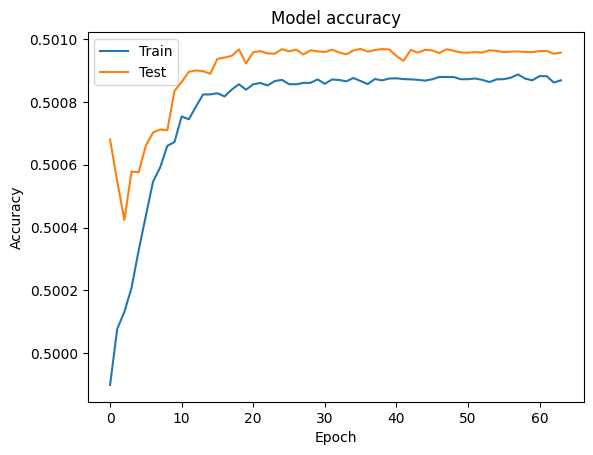

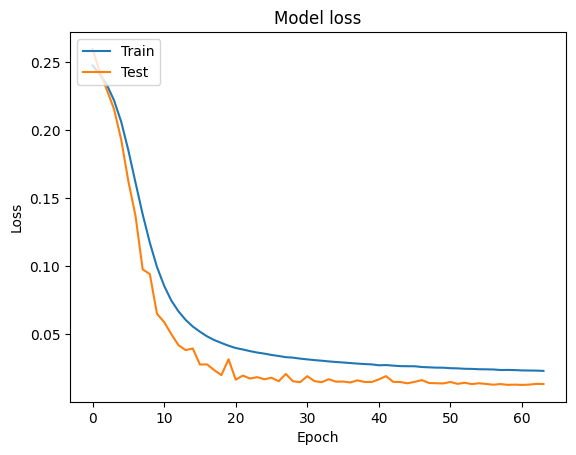

In [ ]:
for i in range(1):
    history = model.fit([x_train[:, 0], x_train[:, 1]], y_train,
          batch_size = 512,
          epochs = 64,
          validation_split = 0.25,
          verbose = 1)
    stats_avg(history, 32)
    plots(history)

# Saving the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_path_model = 'drive/My Drive/DS340/siamese_model.h5'
model.save(save_path_model)

In [ ]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    print(name, weight)

kernel [[ 1.3745590e-01 -4.0700618e-02  2.0154147e-01 ... -1.7348868e-01
   2.8674452e-02 -1.4593700e-01]
 [ 7.7968307e-02  1.6163713e-01 -7.0739096e-01 ... -2.6128373e-01
  -1.9722506e-01 -5.7891671e-02]
 [-3.2188731e-01 -7.7844487e-04 -4.8055574e-01 ...  6.1637171e-02
   1.2634066e-01  1.0692663e-01]
 ...
 [-3.4149128e-01 -3.7546283e-01 -1.4629053e-01 ...  3.9744455e-01
  -1.3194479e-01  4.3158072e-01]
 [-6.8016876e-03 -3.9793703e-01  2.8667611e-01 ...  2.3915857e-01
  -4.7891539e-01 -2.0459521e-01]
 [-1.3994036e+00 -1.0534145e+00 -9.3212914e-01 ... -4.5203632e-01
   2.5944334e-01  3.6717549e-01]]
bias [ 5.18910438e-02  1.23292096e-01  1.57333210e-01  1.04150660e-01
  2.35024974e-01  2.74137799e-02 -4.33685537e-03  4.23833281e-02
  2.48555705e-01  0.00000000e+00  2.95029610e-01 -2.88684487e-01
 -2.33607814e-02 -8.99807811e-02 -2.38974206e-02 -3.08810800e-01
  3.75978760e-02 -1.45097360e-01 -1.07163213e-01  1.41556844e-01
 -1.41716674e-02  2.92666644e-01  5.24296686e-02 -2.50429776e-0

# Testing and evaluating the model

In [ ]:
p = np.random.permutation(165895)
x_test = x_test[p]
y_test = y_test[p]

y_pred = model.predict([x_test[:, 0], x_test[:, 1]])
y_pred = (y_pred <= 0.5)

5185/5185 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


In [ ]:
evaluation = model.evaluate([x_train[:, 0], x_train[:, 1]], y_train)
print('Loss:', evaluation[0])
print('Accuracy:', evaluation[1])

20737/20737 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.5153 - loss: 0.0135
Loss: 0.013358138501644135
Accuracy: 0.5152475237846375


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted: 0', 'Predicted: 1'],
                           index = ['Actual:0', 'Actual:1'])

print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

Accuracy: 0.9873534464570963


,Predicted: 0,Predicted: 1
Actual:0,81940,951
Actual:1,1147,81857


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82891
           1       0.99      0.99      0.99     83004

    accuracy                           0.99    165895
   macro avg       0.99      0.99      0.99    165895
weighted avg       0.99      0.99      0.99    165895



In [ ]:
test_pairs = []
test_pairs += [[hd1x[0], hd1x[1]]]
test_pairs += [[hd0x[1], hd0x[0]]]
test_pairs += [[hd0x[100], hd1x[200]]]
test_pairs += [[hd1x[100], hd0x[200]]]
test_pairs = np.array(test_pairs)
test_preds = model.predict([test_pairs[:, 0], test_pairs[:, 1]])
test_preds = (test_preds <= 0.5)
test_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


array([[ True],
       [ True],
       [False],
       [False]])